In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Plot examples

In [2]:
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.particles import particle_paths

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,8)

from h5py import File
import os

In [3]:
# Open a file, fine the particle paths from the root attributes
# Pick one:
H5FILE = 'data/bmad_particles2.h5'
#H5FILE = 'data/distgen_particles.h5'
#H5FILE = 'data/astra_particles.h5'

# Load
h5 = File(H5FILE)
ppaths = particle_paths(h5)
ph5 = h5[ppaths[0]]

P = ParticleGroup(ph5)
str(P)

'ParticleGroup with 100000 particles with total charge 2.499999999999999e-10 C'

# Slice statistics

In [4]:
from pmd_beamphysics.plot import slice_plot

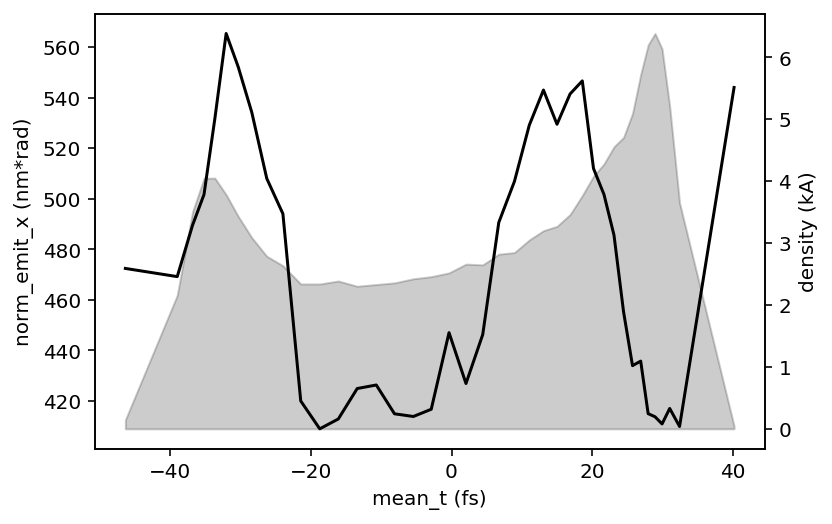

In [5]:

P.t = P.t - P['mean_t']
slice_plot(P, 'norm_emit_x', slice_key='t')

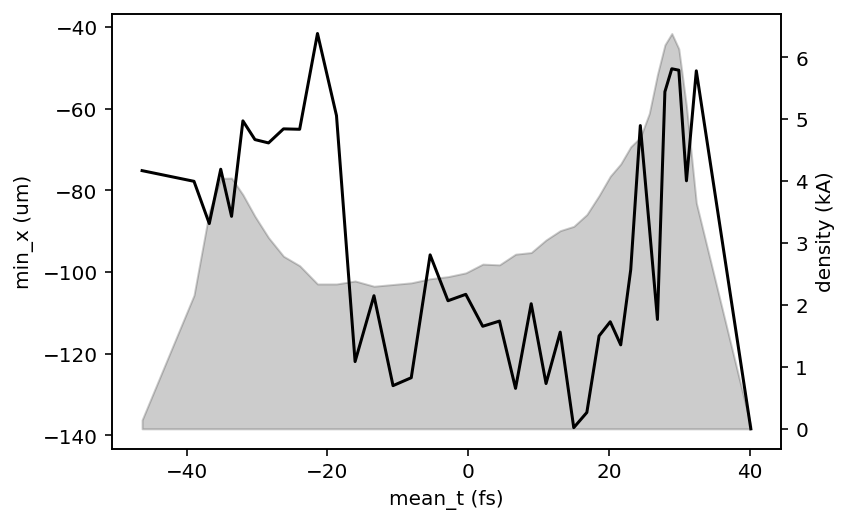

In [6]:
slice_plot(P, 'min_x', slice_key='t')

# Density plots

In [7]:
from pmd_beamphysics.plot import marginal_plot

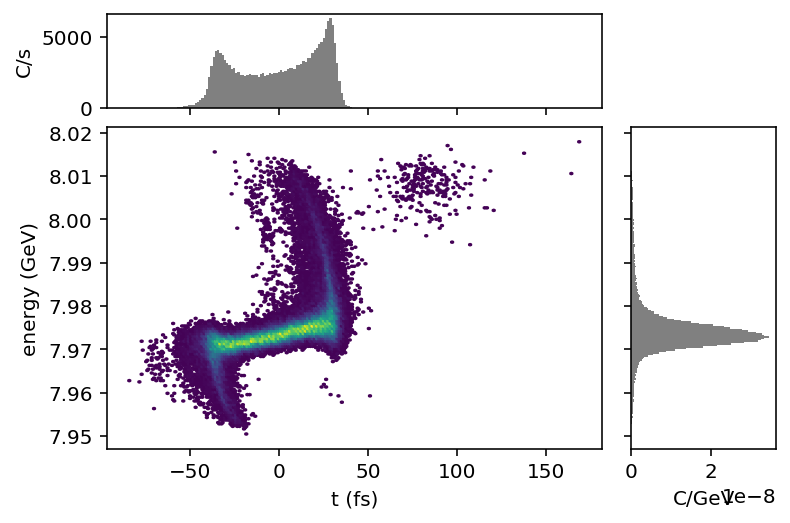

In [8]:
marginal_plot(P, 't', 'energy', bins=200)

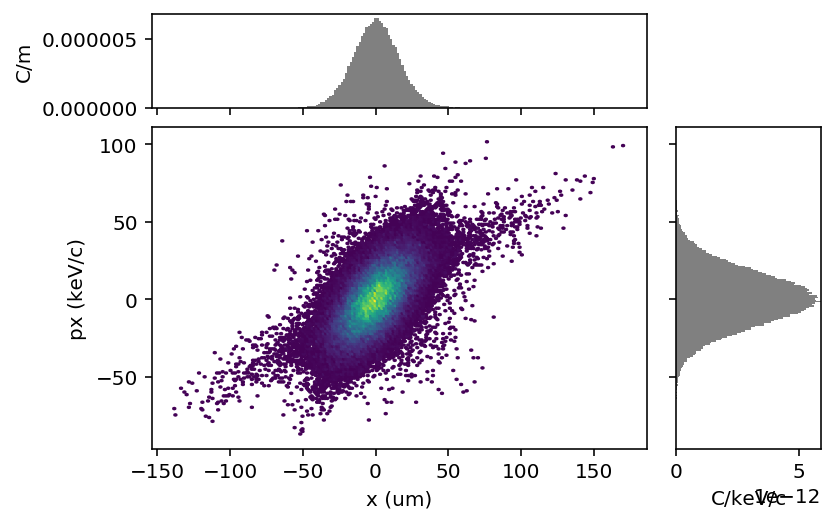

In [9]:
marginal_plot(P, 'x', 'px', bins=200)